In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import seaborn as sns
from matplotlib import pyplot as pl
import matplotlib.pyplot as plt
from matplotlib import style
from datetime import date
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

# A- PRESENT STATE ANALYTICS

In [2]:
#Read CSV File
data_csv = pd.read_csv("covid_19_india.csv")

In [3]:
data_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3711 entries, 0 to 3710
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       3711 non-null   int64 
 1   Date                      3711 non-null   object
 2   Time                      3711 non-null   object
 3   State/UnionTerritory      3711 non-null   object
 4   ConfirmedIndianNational   3711 non-null   object
 5   ConfirmedForeignNational  3711 non-null   object
 6   Cured                     3711 non-null   int64 
 7   Deaths                    3711 non-null   int64 
 8   Confirmed                 3711 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 261.1+ KB


In [4]:
pd.read_csv('covid_19_india.csv', nrows = 3711)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
3706,3707,03/07/20,8:00 AM,Tripura,-,-,1146,1,1435
3707,3708,03/07/20,8:00 AM,Uttarakhand,-,-,2405,42,2984
3708,3709,03/07/20,8:00 AM,Uttar Pradesh,-,-,17221,735,24825
3709,3710,03/07/20,8:00 AM,West Bengal,-,-,13037,699,19819


In [5]:
#sns.set(style='ticks')
#b = sns.pairplot(data)
#b.map(plt.plot)

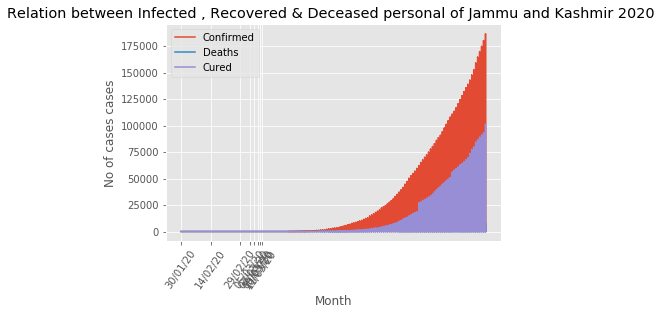

In [6]:
plt.style.use('ggplot')
plt.plot(data_csv.Date,data_csv.Confirmed,label="Confirmed")
plt.plot(data_csv.Date,data_csv.Deaths,label="Deaths")
plt.plot(data_csv.Date,data_csv.Cured,label="Cured")
plt.title("Relation between Infected , Recovered & Deceased personal of Jammu and Kashmir 2020 ")
plt.xlabel("Month")
plt.ylabel("No of cases cases")
plt.xticks(data_csv.Date[0:118:15].tolist(),rotation=55)
plt.legend()
plt.show()

In [7]:
dframe_state_data = pd.pivot_table(data_csv, values = ['Confirmed', 'Cured', 'Deaths'], index = 'State/UnionTerritory', aggfunc = 'max')
dframe_state_data['Death Rate'] = round(dframe_state_data['Deaths'] / dframe_state_data['Confirmed'], 2)
dframe_state_data = dframe_state_data.sort_values(by = 'Confirmed', ascending = False).reset_index(level = 0)
dframe_state_data.style.background_gradient(cmap = 'Spectral')

,State/UnionTerritory,Confirmed,Cured,Deaths,Death Rate
0,Maharashtra,186626,101172,8178,0.040000
1,Tamil Nadu,98392,56021,1321,0.010000
2,Delhi,92175,63007,2864,0.030000
3,Gujarat,33913,24593,1886,0.060000
4,Uttar Pradesh,24825,17221,735,0.030000
5,West Bengal,19819,13037,699,0.040000
6,Rajasthan,18662,14948,430,0.020000
7,Telangana,18570,9069,275,0.010000
8,Karnataka,18016,8334,272,0.020000
9,Andhra Pradesh,16097,7313,198,0.010000


<b>Covid data set of Jammu and Kashmir</b>

In [8]:
#Read CSV File
data_csv_jammu = data_csv[data_csv['State/UnionTerritory'] == "Jammu and Kashmir"]

In [9]:
data_csv_jammu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117 entries, 81 to 3688
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       117 non-null    int64 
 1   Date                      117 non-null    object
 2   Time                      117 non-null    object
 3   State/UnionTerritory      117 non-null    object
 4   ConfirmedIndianNational   117 non-null    object
 5   ConfirmedForeignNational  117 non-null    object
 6   Cured                     117 non-null    int64 
 7   Deaths                    117 non-null    int64 
 8   Confirmed                 117 non-null    int64 
dtypes: int64(4), object(5)
memory usage: 9.1+ KB


In [10]:
data_csv_jammu.describe()

,Sno,Cured,Deaths,Confirmed
count,117.00000,117.000000,117.000000,117.000000
mean,1711.00000,922.478632,23.726496,1867.615385
std,1098.76025,1351.343473,30.449399,2323.779342
min,82.00000,0.000000,0.000000,1.000000
25%,721.00000,4.000000,2.000000,116.000000
50%,1652.00000,320.000000,8.000000,741.000000
75%,2644.00000,1007.000000,34.000000,2857.000000
max,3689.00000,4974.000000,115.000000,7849.000000


In [11]:
dframe_state_data = pd.pivot_table(data_csv_jammu, values = ['Confirmed', 'Cured', 'Deaths'], index = 'State/UnionTerritory', aggfunc = 'max')
dframe_state_data['Death Rate'] = round(dframe_state_data['Deaths'] / dframe_state_data['Confirmed'], 2)
dframe_state_data = dframe_state_data.sort_values(by = 'Confirmed', ascending = False).reset_index(level = 0)
dframe_state_data.style.background_gradient(cmap = 'Spectral')

,State/UnionTerritory,Confirmed,Cured,Deaths,Death Rate
0,Jammu and Kashmir,7849,4974,115,0.010000


In [12]:
data_csv_jammu= pd.read_csv('covid_19_india.csv', index_col = 1, parse_dates = True, dayfirst = True)
start_date = '2020-01-09'
end_date   = '2020-07-07'
data_csv_jammu = data_csv_jammu.loc[start_date : end_date]
data_csv_jammu2 = data_csv_jammu.loc[(data_csv_jammu['State/UnionTerritory'] == 'Jammu and Kashmir')]
data_csv_jammu = pd.DataFrame(data_csv_jammu2)
data_csv_jammu = data_csv_jammu.reset_index()
data_csv_jammu.get(['Sno', 'Date', 'Time', 'State/UnionTerritory', 'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured', 'Deaths', 'Confirmed'])
for data in data_csv_jammu.index:
    data_csv_jammu['Sno'][data], data_csv_jammu['Date'][data], data_csv_jammu['Time'][data], data_csv_jammu['State/UnionTerritory'][data], data_csv_jammu['ConfirmedIndianNational'][data], data_csv_jammu['ConfirmedForeignNational'][data], data_csv_jammu['Cured'][data], data_csv_jammu['Deaths'][data], data_csv_jammu['Confirmed'][data]
data_csv_jammu

,Date,Sno,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,2020-03-09,82,6:00 PM,Jammu and Kashmir,1,0,0,0,1
1,2020-03-10,97,6:00 PM,Jammu and Kashmir,1,0,0,0,1
2,2020-03-11,107,6:00 PM,Jammu and Kashmir,1,0,0,0,1
3,2020-03-12,118,6:00 PM,Jammu and Kashmir,1,0,0,0,1
4,2020-03-13,131,6:00 PM,Jammu and Kashmir,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
112,2020-06-29,3545,8:00 AM,Jammu and Kashmir,-,-,4316,94,7093
113,2020-06-30,3581,8:00 AM,Jammu and Kashmir,-,-,4585,95,7237
114,2020-07-01,3617,8:00 AM,Jammu and Kashmir,-,-,4722,101,7497
115,2020-07-02,3653,8:00 AM,Jammu and Kashmir,-,-,4856,105,7695


<b>Using matplotbit to Visualise Covid data of delhi</b>

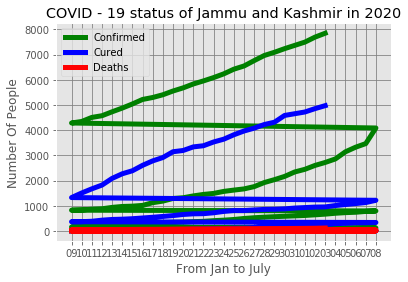

In [13]:
dateList = [data.strftime("%d") for data in data_csv_jammu['Date'].tolist()]
pl.plot(dateList, data_csv_jammu['Confirmed'].tolist(), color = 'green', label = 'Confirmed', linewidth = 5)
pl.plot(dateList, data_csv_jammu['Cured'].tolist(), color = 'blue', label = 'Cured', linewidth = 5)
pl.plot(dateList, data_csv_jammu['Deaths'].tolist(), color = 'red', label = 'Deaths', linewidth = 5)
pl.title('COVID - 19 status of Jammu and Kashmir in 2020')
pl.xlabel('From Jan to July')
pl.ylabel('Number Of People')
pl.legend()
pl.grid(True, color = 'gray')
pl.legend(loc = 'best')
pl.show()

 <b>Pie Chart to visualise the Data of Jammu and Kashmir</b>

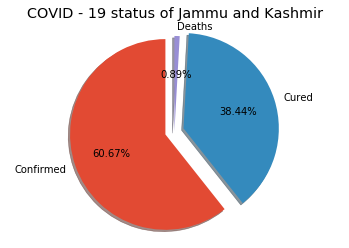

In [14]:
fig, ax = pl.subplots()
group1 = [7849, 4974, 115]
group2 = [0.1, 0.1, 0]
group3 = ['Confirmed', 'Cured', 'Deaths']
ax.pie(group1, explode = group2, labels = group3, autopct = '%1.2f%%', shadow = True, startangle = 90)
ax.axis('Equal')
ax.set_title('COVID - 19 status of Jammu and Kashmir')
pl.show()

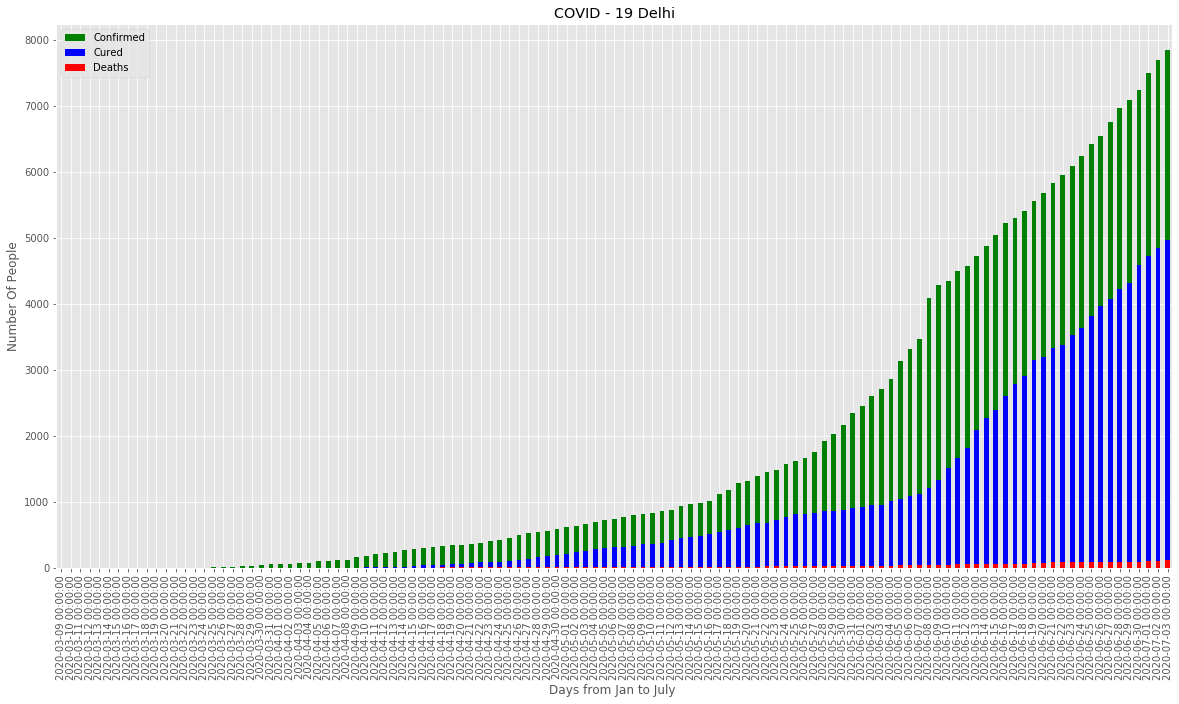

In [15]:
fig, ax = pl.subplots()
data_csv_jammu.plot(kind = 'bar', x = 'Date', y = 'Confirmed', color = 'green', figsize = (20, 10), ax = ax)
data_csv_jammu.plot(kind = 'bar', x = 'Date', y = 'Cured', color = 'blue', figsize = (20, 10), ax = ax)
data_csv_jammu.plot(kind = 'bar', x = 'Date', y = 'Deaths', color = 'red', figsize = (20, 10), ax = ax)
ax.set_title('COVID - 19 Delhi')
ax.set_xlabel('Days from Jan to July ')
ax.set_ylabel('Number Of People')
pl.show()

 <b>Data Visualization Using Matplotlib</b>

# B. Correlation heatmap for various parameters

In [16]:
#Read CSV File
data_csv_jammu = data_csv[data_csv['State/UnionTerritory'] == "Jammu and Kashmir"]

In [17]:
data_csv_jammu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117 entries, 81 to 3688
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       117 non-null    int64 
 1   Date                      117 non-null    object
 2   Time                      117 non-null    object
 3   State/UnionTerritory      117 non-null    object
 4   ConfirmedIndianNational   117 non-null    object
 5   ConfirmedForeignNational  117 non-null    object
 6   Cured                     117 non-null    int64 
 7   Deaths                    117 non-null    int64 
 8   Confirmed                 117 non-null    int64 
dtypes: int64(4), object(5)
memory usage: 9.1+ KB


In [18]:
data_csv_jammu.describe()

,Sno,Cured,Deaths,Confirmed
count,117.00000,117.000000,117.000000,117.000000
mean,1711.00000,922.478632,23.726496,1867.615385
std,1098.76025,1351.343473,30.449399,2323.779342
min,82.00000,0.000000,0.000000,1.000000
25%,721.00000,4.000000,2.000000,116.000000
50%,1652.00000,320.000000,8.000000,741.000000
75%,2644.00000,1007.000000,34.000000,2857.000000
max,3689.00000,4974.000000,115.000000,7849.000000


C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


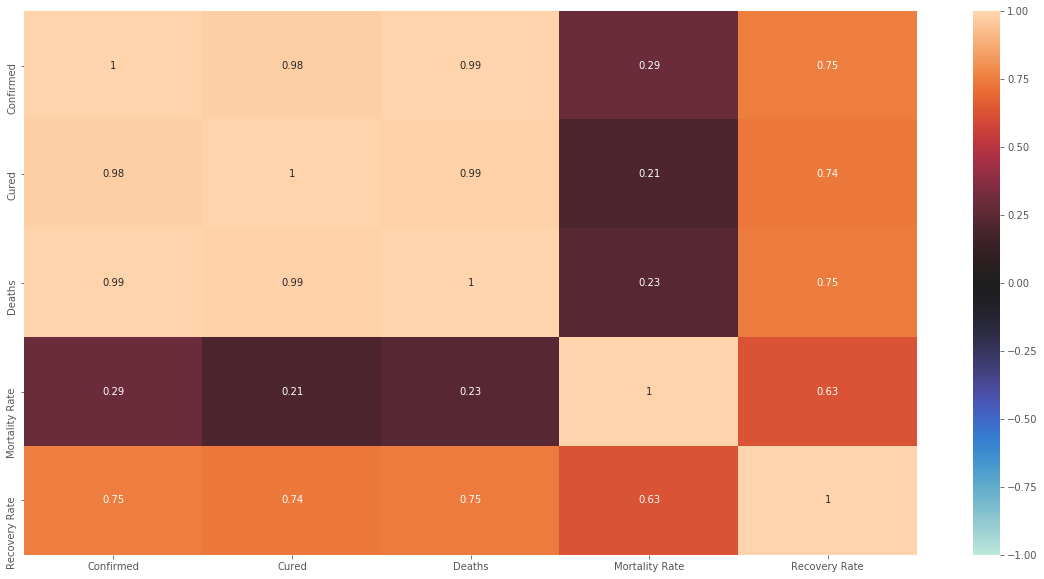

In [19]:
data_csv = data_csv_jammu[['Confirmed', 'Cured', 'Deaths']]
data_csv['Mortality Rate'] = (data_csv['Confirmed']/data_csv['Deaths']).round(2)

data_csv['Recovery Rate'] = (data_csv['Cured']/data_csv['Confirmed']).round(2)
corrmat = data_csv.corr()
pl.style.use('ggplot')
pl.figure(figsize = (20, 10))
sns.heatmap(corrmat, annot = True, vmin = -1, vmax = 1, center = 0, )

In [20]:
data_csv_jammu= pd.read_csv('covid_19_india.csv', index_col = 1, parse_dates = True, dayfirst = True)
start_date = '2020-01-09'
end_date   = '2020-07-07'
data_csv_jammu = data_csv_jammu.loc[start_date : end_date]
data_csv_jammu2 = data_csv_jammu.loc[(data_csv_jammu['State/UnionTerritory'] == 'Jammu and Kashmir')]
data_csv_jammu = pd.DataFrame(data_csv_jammu2)
data_csv_jammu = data_csv_jammu.reset_index()
data_csv_jammu.get(['Sno', 'Date', 'Time', 'State/UnionTerritory', 'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured', 'Deaths', 'Confirmed'])
for data in data_csv_jammu.index:
    data_csv_jammu['Sno'][data], data_csv_jammu['Date'][data], data_csv_jammu['Time'][data], data_csv_jammu['State/UnionTerritory'][data], data_csv_jammu['ConfirmedIndianNational'][data], data_csv_jammu['ConfirmedForeignNational'][data], data_csv_jammu['Cured'][data], data_csv_jammu['Deaths'][data], data_csv_jammu['Confirmed'][data]
data_csv_jammu

,Date,Sno,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,2020-03-09,82,6:00 PM,Jammu and Kashmir,1,0,0,0,1
1,2020-03-10,97,6:00 PM,Jammu and Kashmir,1,0,0,0,1
2,2020-03-11,107,6:00 PM,Jammu and Kashmir,1,0,0,0,1
3,2020-03-12,118,6:00 PM,Jammu and Kashmir,1,0,0,0,1
4,2020-03-13,131,6:00 PM,Jammu and Kashmir,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
112,2020-06-29,3545,8:00 AM,Jammu and Kashmir,-,-,4316,94,7093
113,2020-06-30,3581,8:00 AM,Jammu and Kashmir,-,-,4585,95,7237
114,2020-07-01,3617,8:00 AM,Jammu and Kashmir,-,-,4722,101,7497
115,2020-07-02,3653,8:00 AM,Jammu and Kashmir,-,-,4856,105,7695


In [62]:
da_csv_jammu = data_csv_jammu.get(['State/UnionTerritory', 'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured', 'Deaths', 'Confirmed'])
da_csv_jammu

,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,Jammu and Kashmir,1,0,0,0,1
1,Jammu and Kashmir,1,0,0,0,1
2,Jammu and Kashmir,1,0,0,0,1
3,Jammu and Kashmir,1,0,0,0,1
4,Jammu and Kashmir,1,0,0,0,1
...,...,...,...,...,...,...
112,Jammu and Kashmir,-,-,4316,94,7093
113,Jammu and Kashmir,-,-,4585,95,7237
114,Jammu and Kashmir,-,-,4722,101,7497
115,Jammu and Kashmir,-,-,4856,105,7695


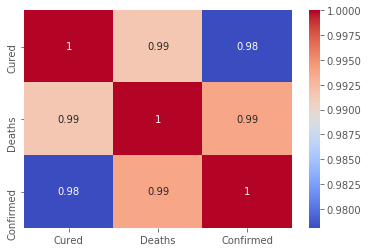

In [63]:
sn.heatmap(da_csv_jammu.corr(),annot=True,cmap="coolwarm")

# C. Build a model for predicting the confirmed and recovered on any dates past 15th July 2020

In [21]:
#Read CSV File
data4_csv = pd.read_csv('state_wise_daily.csv')

In [22]:
data4_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    360 non-null    object
 1   Status  360 non-null    object
 2   TT      360 non-null    int64 
 3   AN      360 non-null    int64 
 4   AP      360 non-null    int64 
 5   AR      360 non-null    int64 
 6   AS      360 non-null    int64 
 7   BR      360 non-null    int64 
 8   CH      360 non-null    int64 
 9   CT      360 non-null    int64 
 10  DN      360 non-null    int64 
 11  DD      360 non-null    int64 
 12  DL      360 non-null    int64 
 13  GA      360 non-null    int64 
 14  GJ      360 non-null    int64 
 15  HR      360 non-null    int64 
 16  HP      360 non-null    int64 
 17  JK      360 non-null    int64 
 18  JH      360 non-null    int64 
 19  KA      360 non-null    int64 
 20  KL      360 non-null    int64 
 21  LA      360 non-null    int64 
 22  LD      360 non-null    in

In [23]:
data4_csv.head(3)

,Date,Status,TT,AN,AP,AR,AS,BR,CH,CT,...,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
0,14-Mar-20,Confirmed,81,0,1,0,0,0,0,0,...,1,3,0,1,1,0,12,0,0,0
1,14-Mar-20,Recovered,9,0,0,0,0,0,0,0,...,0,1,0,0,0,0,4,0,0,0
2,14-Mar-20,Deceased,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
data4_csv['Status'].unique()

array(['Confirmed', 'Recovered', 'Deceased'], dtype=object)

In [25]:
data4_csv['Status'] = data4_csv['Status'].replace("Confirmed", "0")
data4_csv['Status'] = data4_csv['Status'].replace("Recovered", "1")
data4_csv['Status'] = data4_csv['Status'].replace("Deceased", "2")

In [26]:
data4_csv.head(3)

,Date,Status,TT,AN,AP,AR,AS,BR,CH,CT,...,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
0,14-Mar-20,0,81,0,1,0,0,0,0,0,...,1,3,0,1,1,0,12,0,0,0
1,14-Mar-20,1,9,0,0,0,0,0,0,0,...,0,1,0,0,0,0,4,0,0,0
2,14-Mar-20,2,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# separating Independent & dependent col

In [27]:

data4_csv.columns

Index(['Date', 'Status', 'TT', 'AN', 'AP', 'AR', 'AS', 'BR', 'CH', 'CT', 'DN',
       'DD', 'DL', 'GA', 'GJ', 'HR', 'HP', 'JK', 'JH', 'KA', 'KL', 'LA', 'LD',
       'MP', 'MH', 'MN', 'ML', 'MZ', 'NL', 'OR', 'PY', 'PB', 'RJ', 'SK', 'TN',
       'TG', 'TR', 'UP', 'UT', 'WB', 'UN'],
      dtype='object')

In [28]:
x = data4_csv[['TT', 'AN', 'AP', 'AR', 'AS', 'BR', 'CH', 'CT', 'DN', 'DD',
       'DL', 'GA', 'GJ', 'HR', 'HP', 'JK', 'JH', 'KA', 'KL', 'LA', 'LD', 'MP',
       'MH', 'MN', 'ML', 'MZ', 'NL', 'OR', 'PY', 'PB', 'RJ', 'SK', 'TN', 'TG',
       'TR', 'UP', 'UT', 'WB', 'UN']] .values  
x[0:5]

array([[81,  0,  1,  0,  0,  0,  0,  0,  0,  0,  7,  0,  0, 14,  0,  2,
         0,  6, 19,  0,  0,  0, 14,  0,  0,  0,  0,  0,  0,  1,  3,  0,
         1,  1,  0, 12,  0,  0,  0],
       [ 9,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
         0,  0,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,
         0,  0,  0,  4,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
         0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0],
       [27,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  5,  0,  0,  0, 18,  0,  0,  0,  0,  0,  0,  0,  1,  0,
         0,  2,  0,  1,  0,  0,  0],
       [ 4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,
         0,  1,  0,  0,  0,  0,  0]], dtype=int64)

In [29]:
y = data4_csv['Status'].values
y[0:5]

array(['0', '1', '2', '0', '1'], dtype=object)

In [30]:
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
x[0:5]  #standardization of data

array([[-0.62332645, -0.32303937, -0.4386345 , -0.30973849, -0.446348  ,
        -0.58082109, -0.3943513 , -0.52017994, -0.34019096,  0.        ,
        -0.53991734, -0.4223854 , -0.84290255, -0.47628796, -0.56584543,
        -0.56989762, -0.50015049, -0.37202995, -0.2066359 , -0.28043389,
         0.        , -0.85815848, -0.63279235, -0.38864151, -0.1497335 ,
        -0.21995801, -0.33395707, -0.51704977, -0.38941417, -0.45565176,
        -0.77854272, -0.18765242, -0.57020969, -0.39757488, -0.40825222,
        -0.59223085, -0.50903213, -0.5980912 , -0.04798096],
       [-0.635034  , -0.32303937, -0.44243247, -0.30973849, -0.446348  ,
        -0.58082109, -0.3943513 , -0.52017994, -0.34019096,  0.        ,
        -0.5457652 , -0.4223854 , -0.84290255, -0.55314795, -0.56584543,
        -0.59637028, -0.50015049, -0.38829982, -0.46583077, -0.28043389,
         0.        , -0.85815848, -0.64099817, -0.38864151, -0.1497335 ,
        -0.21995801, -0.33395707, -0.51704977, -0.38941417, -0.

In [31]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=2)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape) #trainning model and predicting

Train set: (288, 39) (288,)
Test set: (72, 39) (72,)


In [32]:
k = 3
neighbors = KNeighborsClassifier(n_neighbors = k).fit(x_train, y_train)
neighbors

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [33]:
yhat = neighbors.predict(x_test)  
yhat[0:15]

array(['0', '2', '2', '2', '0', '0', '0', '2', '1', '2', '1', '2', '0',
       '2', '1'], dtype=object)

In [34]:
score = neighbors.score(x_test, y_test)
print('Model accuracy is {}'.format(score.round(2)))

Model accuracy is 0.64


# D. Build a classifier for severity gauging

In [35]:
#Read CSV File
data5_csv = pd.read_csv('PALM_Data.csv')


In [38]:
data5_csv .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Date                      101 non-null    object
 1   Time                      101 non-null    object
 2   State/UnionTerritory      101 non-null    object
 3   ConfirmedIndianNational   101 non-null    object
 4   Gender                    101 non-null    object
 5   ConfirmedForeignNational  101 non-null    object
 6   Age                       101 non-null    int64 
 7   Serious symptoms          101 non-null    object
 8   Less common symptoms      101 non-null    object
 9   Most common symptoms      101 non-null    object
 10  Severity                  101 non-null    object
 11  Patient_Status            101 non-null    object
dtypes: int64(1), object(11)
memory usage: 9.6+ KB


In [39]:
data5_csv.describe()

,Age
count,101.000000
mean,49.782178
std,27.754497
min,7.000000
25%,23.000000
50%,47.000000
75%,75.000000
max,100.000000


In [40]:
data5_csv = pd.read_csv("PALM_Data.csv")
data5_csv.head()

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,Gender,ConfirmedForeignNational,Age,Serious symptoms,Less common symptoms,Most common symptoms,Severity,Patient_Status
0,03-09-2020,6:00 PM,Jammu and Kashmir,1,Female,0,37,chest pain or pressure,"a rash on skin, or discolouration of fingers o...",fever,Seviour,Covid
1,03-10-2020,6:00 PM,Jammu and Kashmir,1,Male,0,72,loss of speech or movement,headache,tiredness,Moderate,Covid
2,03-11-2020,6:00 PM,Jammu and Kashmir,1,Female,0,85,difficulty breathing or shortness of breath,sore throat,fever,Seviour,flu
3,03-12-2020,6:00 PM,Jammu and Kashmir,1,Male,0,17,difficulty breathing or shortness of breath,loss of taste or smell,tiredness,Mild,flu
4,13-03-2020,6:00 PM,Jammu and Kashmir,1,Male,0,93,difficulty breathing or shortness of breath,sore throat,fever,Moderate,Covid


In [41]:
pd.read_csv('PALM_Data.csv', nrows = 102)

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,Gender,ConfirmedForeignNational,Age,Serious symptoms,Less common symptoms,Most common symptoms,Severity,Patient_Status
0,03-09-2020,6:00 PM,Jammu and Kashmir,1,Female,0,37,chest pain or pressure,"a rash on skin, or discolouration of fingers o...",fever,Seviour,Covid
1,03-10-2020,6:00 PM,Jammu and Kashmir,1,Male,0,72,loss of speech or movement,headache,tiredness,Moderate,Covid
2,03-11-2020,6:00 PM,Jammu and Kashmir,1,Female,0,85,difficulty breathing or shortness of breath,sore throat,fever,Seviour,flu
3,03-12-2020,6:00 PM,Jammu and Kashmir,1,Male,0,17,difficulty breathing or shortness of breath,loss of taste or smell,tiredness,Mild,flu
4,13-03-2020,6:00 PM,Jammu and Kashmir,1,Male,0,93,difficulty breathing or shortness of breath,sore throat,fever,Moderate,Covid
...,...,...,...,...,...,...,...,...,...,...,...,...
96,13-06-2020,8:00 AM,Jammu and Kashmir,-,Male,-,26,loss of speech or movement,conjunctivitis,dry cough,Seviour,Covid
97,14-06-2020,8:00 AM,Jammu and Kashmir,-,Male,-,73,loss of speech or movement,headache,fever,Moderate,Covid
98,15-06-2020,8:00 AM,Jammu and Kashmir,-,Female,-,29,chest pain or pressure,diarrhoea,tiredness,Seviour,flu
99,16-06-2020,8:00 AM,Jammu and Kashmir,-,Female,-,79,chest pain or pressure,sore throat,fever,Mild,flu


In [45]:
data5_csv.columns

Index(['Date', 'Time', 'State/UnionTerritory', 'ConfirmedIndianNational',
       'Gender ', 'ConfirmedForeignNational', 'Age ', 'Serious symptoms',
       'Less common symptoms', 'Most common symptoms', 'Severity',
       'Patient_Status '],
      dtype='object')

In [ ]:
sn.heatmap(frame_list.corr(),annot=True,cmap="coolwarm")

In [46]:
labelEncoder = LabelEncoder()
x[:,0] = labelEncoder.fit_transform(x[:,0])
x[:,2] = labelEncoder.fit_transform(x[:,2])
x[:,5] = labelEncoder.fit_transform(x[:,5])
x[:,6] = labelEncoder.fit_transform(x[:,6]) #converting string into numberic data to perform ML
x[:,7] = labelEncoder.fit_transform(x[:,7])
x[:,8] = labelEncoder.fit_transform(x[:,8])
x[:,9] = labelEncoder.fit_transform(x[:,9])

In [47]:
x1 = pd.DataFrame(x)
x1

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,43.0,-0.323039,1.0,-0.309738,-0.446348,0.0,0.0,0.0,0.0,0.0,...,-0.455652,-0.778543,-0.187652,-0.570210,-0.397575,-0.408252,-0.592231,-0.509032,-0.598091,-0.047981
1,8.0,-0.323039,0.0,-0.309738,-0.446348,0.0,0.0,0.0,0.0,0.0,...,-0.468815,-0.792201,-0.187652,-0.571136,-0.400210,-0.408252,-0.623599,-0.509032,-0.598091,-0.047981
2,2.0,-0.323039,0.0,-0.309738,-0.446348,0.0,0.0,0.0,0.0,0.0,...,-0.468815,-0.799031,-0.187652,-0.571136,-0.400210,-0.408252,-0.639283,-0.509032,-0.598091,-0.047981
3,18.0,-0.323039,0.0,-0.309738,-0.446348,0.0,0.0,0.0,0.0,0.0,...,-0.468815,-0.792201,-0.187652,-0.571136,-0.394939,-0.408252,-0.635362,-0.509032,-0.598091,-0.047981
4,4.0,-0.323039,0.0,-0.309738,-0.446348,0.0,0.0,0.0,0.0,0.0,...,-0.468815,-0.785372,-0.187652,-0.571136,-0.397575,-0.408252,-0.639283,-0.509032,-0.598091,-0.047981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,293.0,3.897314,131.0,-0.309738,3.815006,134.0,5.0,67.0,18.0,0.0,...,0.478906,2.957096,2.335144,3.283816,2.269469,1.088306,1.948609,0.498985,1.777185,-0.047981
356,122.0,-0.323039,15.0,-0.309738,-0.397716,2.0,0.0,2.0,0.0,0.0,...,-0.416163,-0.758055,-0.187652,-0.511871,-0.379127,-0.408252,-0.533415,-0.509032,-0.479782,-0.047981
357,302.0,-0.323039,140.0,1.119824,2.805898,137.0,13.0,36.0,12.0,0.0,...,2.558626,3.121000,7.100425,3.100467,2.704313,0.956257,4.818816,0.795460,5.517561,-3.815104
358,290.0,-0.323039,135.0,0.881563,3.067294,138.0,5.0,24.0,12.0,0.0,...,-0.166070,0.901471,-0.187652,2.754142,4.116897,-0.276203,2.897503,-0.153261,2.182165,-0.047981


In [50]:
x1[1] = x1[1].replace('-', 0)
x1[3] = x1[3].replace('-', 0)

In [51]:
x = x1[[0, 1, 2, 3, 4, 5, 6, 7, 8]].values  
x[0:5]

array([[43.        , -0.32303937,  1.        , -0.30973849, -0.446348  ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 8.        , -0.32303937,  0.        , -0.30973849, -0.446348  ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 2.        , -0.32303937,  0.        , -0.30973849, -0.446348  ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [18.        , -0.32303937,  0.        , -0.30973849, -0.446348  ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 4.        , -0.32303937,  0.        , -0.30973849, -0.446348  ,
         0.        ,  0.        ,  0.        ,  0.        ]])

In [52]:
y = x1[9].values
y = y.astype('int')
y[0:5]

array([0, 0, 0, 0, 0])

In [53]:
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
x[0:5]

array([[-0.95952826, -0.32303937, -0.83663217, -0.30973849, -0.446348  ,
        -0.72058321, -0.52770437, -0.55414026, -0.37162602],
       [-1.33525254, -0.32303937, -0.86083366, -0.30973849, -0.446348  ,
        -0.72058321, -0.52770437, -0.55414026, -0.37162602],
       [-1.39966242, -0.32303937, -0.86083366, -0.30973849, -0.446348  ,
        -0.72058321, -0.52770437, -0.55414026, -0.37162602],
       [-1.22790275, -0.32303937, -0.86083366, -0.30973849, -0.446348  ,
        -0.72058321, -0.52770437, -0.55414026, -0.37162602],
       [-1.37819246, -0.32303937, -0.86083366, -0.30973849, -0.446348  ,
        -0.72058321, -0.52770437, -0.55414026, -0.37162602]])

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)
print('Train set :', x_train.shape, y_train.shape)
print('Test set :', x_test.shape, y_test.shape)

Train set : (288, 9) (288,)
Test set : (72, 9) (72,)


In [55]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [56]:
yhat = knn.predict(x_test)
yhat[0:5]

array([0, 0, 0, 0, 0])

In [57]:
print('Train set Accuracy :', metrics.accuracy_score(y_train, knn.predict(x_train)))
print('Test set Accuracy :', metrics.accuracy_score(y_test, yhat))

Train set Accuracy : 1.0
Test set Accuracy : 1.0
